In [3]:
import pandas as pd
import numpy as np

## Simple Moving Averages

In [4]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
index_col=0, parse_dates=True).dropna()

In [5]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [6]:
data = pd.DataFrame(raw['EUR='])

data.rename(columns={'EUR=': 'price'}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [7]:
data['SMA1'] = data['price'].rolling(42).mean()
data['SMA2'] = data['price'].rolling(252).mean()

data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [8]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'


Bad key "text.kerning_factor" on line 4 in
C:\Users\Jefferson\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


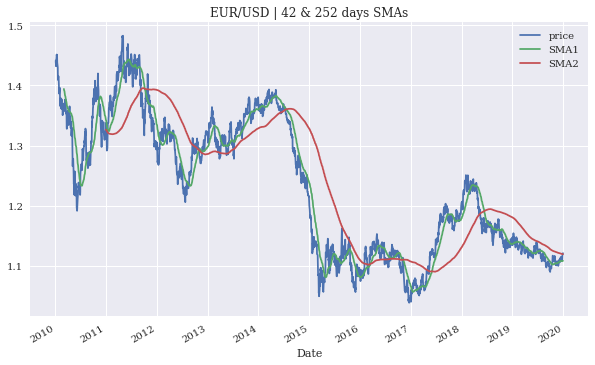

In [9]:
data.plot(title='EUR/USD | 42 & 252 days SMAs',
figsize=(10, 6))

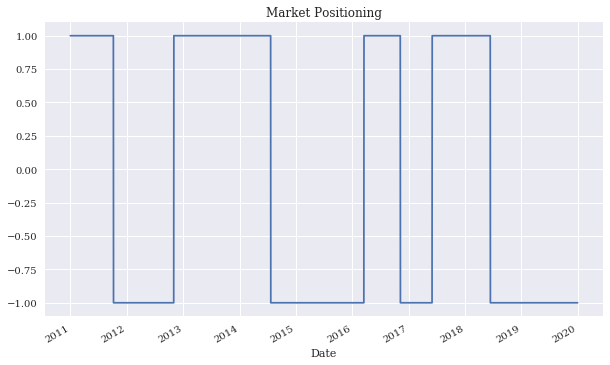

In [10]:
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

data.dropna(inplace=True)

data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(10, 6))

Para calcular o desempenho da estratégia, calculamos o logaritmo do retorno, baseado na série temporal.

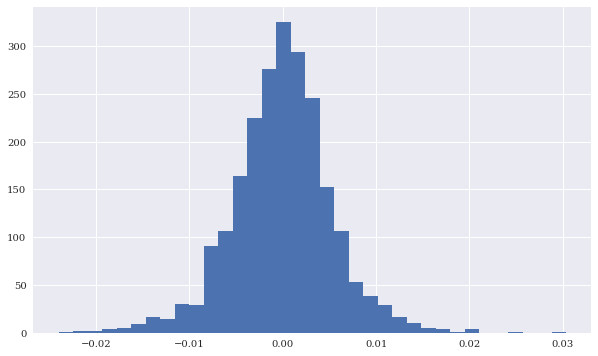

In [11]:
# calcular o retorno logaritmo
data['returns'] = np.log(data['price'] / data['price'].shift(1))

# criar o histograma
data['returns'].hist(bins=35, figsize=(10, 6))

In [12]:
data['strategy'] = data['position'].shift(1) * data['returns']
data[['returns', 'strategy']].sum()

returns    -0.176731
strategy    0.253121
dtype: float64

In [13]:
data[['returns', 'strategy']].sum().apply(np.exp)

returns     0.838006
strategy    1.288039
dtype: float64

Calculating the cumulative sum over time with cumsum and, based on this, the cumulative
returns by applying the exponential function np.exp() gives a more comprehensive
picture of how the strategy compares to the performance of the base financial

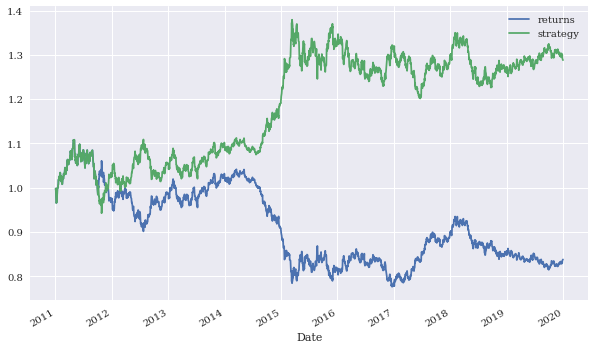

In [14]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))